<a href="https://colab.research.google.com/github/sameertipnis/AlgoTrading/blob/main/Lecture3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agenda 

### 1.   Announcement for 2 projects 
### 2.   Review of the second lecture
### 3.   EMA 
### 4.   Order book 
### 5.   VWAP - Arrival Price 


[Boost SML Link](https://boost-ext.github.io/sml/index.html)

## Project - 1  
### Implement any statistical arbitrage strategy using the model of your choice
#### Overview Deadline - 8th July 2022
#### Submission Deadline - 15th July 2022 
## Project - 2 
### Implement a machine learning model based trading strategy. 
## Project Requirement - Preferably python note book on github or google drive 

# Review of the second lecture 
## Momentum strategies 
## Mean reversal strategies

# EMA and Half Life 
[EMA Function in Pandaas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html)

#### Data - ( Public Data ) a-symmetry is not there 
#### Extract more information out of same data - model more events  


###Structure of the Book

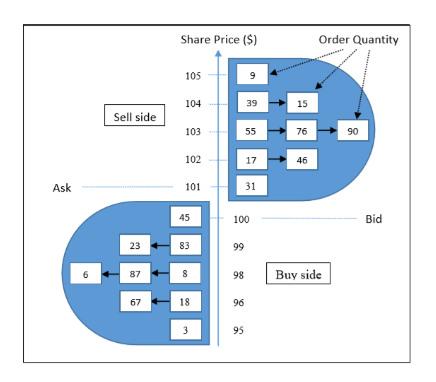

#### Hit the Bid - Sell at the highest Bid 
#### Cust 1 wants to Sell 40 @ 100 -> It willl cross - order # 1
#### In market data feed you will see a trade execution 
#### In market data feed you will see a book update
#### Cust 2 wants to Sell 40 @ 101 -> Fill or Kill / IOC -> Expiry Order # 5
#### No updates in market data feed  
#### Cust 2 wants to Sell 20 and 20 @ 101 -> Good Tilll Cancel -> Rest on the book  
#### Book Update 


#### Lift the Offer - Buy at lowest Ask


#### Marketable Order

#### Two Types of Connection 
##### Connection to Send Order Flow
###### Provide Liquidity  - Market Makers
###### Seek Liquidity  - Market Takers


##### Connection to get Market Data


#### Ist Class Payment for Order Flow - Robin Hood - Citadel
#### Cust 1  -> Robinhood -> places a buy order @ 101



#### Write a python program
#### Take all preopen orders and create a book -> Read it from the file - Pre Open Order file
#### Symbol, size, price, aggressor_side
#### Take Market Orders
####  Only take two types of Order - IOC / Limit
####  Read them from a file Market Order File
#### Market Order File
#### TimeStamp < 45> -> 9:30:45, Symbol, price, side, size,  type of Order 
#### Output Execution File, Market Data Feed, Closing Price ( Bid Size * Offer price + OfferSize * bid price )/ ( Bid Size + Offer Size )



#### Book Imbalance 
#### Matching - Procees 
#### NBBO - National Best Bid Offer
#### ISO Order - To sweep price level at one  exchanges  // ISO Obligation is with Order Sender
#### DISO Order - Directed ISO -> you can send it exchange one to sweep price level at second exchange.


#### VWAP Indicator

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
tsla = pd.read_csv('/content/drive/My Drive/NYU/AlgoTrading-Summer-2022/TSLA.csv')

In [7]:
tsla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-22,618.250000,628.570007,615.500000,623.710022,623.710022,19158900
1,2021-06-23,632.000000,657.200012,630.039978,656.570007,656.570007,31099200
2,2021-06-24,674.989990,697.619995,667.609985,679.820007,679.820007,45982400
3,2021-06-25,689.580017,693.809998,668.700012,671.869995,671.869995,32496700
4,2021-06-28,671.640015,694.700012,670.320007,688.719971,688.719971,21628200


In [8]:
tsla["AveragePrice"] =  (tsla["Open"] + tsla["High"] + tsla["Close"] )/ 3.0

In [9]:
tsla.head()

,Date,Open,High,Low,Close,Adj Close,Volume,AveragePrice
0,2021-06-22,618.250000,628.570007,615.500000,623.710022,623.710022,19158900,623.510010
1,2021-06-23,632.000000,657.200012,630.039978,656.570007,656.570007,31099200,648.590006
2,2021-06-24,674.989990,697.619995,667.609985,679.820007,679.820007,45982400,684.143331
3,2021-06-25,689.580017,693.809998,668.700012,671.869995,671.869995,32496700,685.086670
4,2021-06-28,671.640015,694.700012,670.320007,688.719971,688.719971,21628200,685.019999


In [10]:
tsla['vwap']  = (tsla["AveragePrice"] * tsla["Volume"]).cumsum() / tsla["Volume"].cumsum()

In [11]:
tsla.head()

,Date,Open,High,Low,Close,Adj Close,Volume,AveragePrice,vwap
0,2021-06-22,618.250000,628.570007,615.500000,623.710022,623.710022,19158900,623.510010,623.510010
1,2021-06-23,632.000000,657.200012,630.039978,656.570007,656.570007,31099200,648.590006,639.029256
2,2021-06-24,674.989990,697.619995,667.609985,679.820007,679.820007,45982400,684.143331,660.584146
3,2021-06-25,689.580017,693.809998,668.700012,671.869995,671.869995,32496700,685.086670,666.769236
4,2021-06-28,671.640015,694.700012,670.320007,688.719971,688.719971,21628200,685.019999,669.394382


In [19]:
tsla["vwap-1"] = tsla["vwap"].shift(1)

In [21]:
tsla.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume,AveragePrice,vwap,vwap-1
1,2021-06-23,632.000000,657.200012,630.039978,656.570007,656.570007,31099200,648.590006,639.029256,623.510010
2,2021-06-24,674.989990,697.619995,667.609985,679.820007,679.820007,45982400,684.143331,660.584146,639.029256
3,2021-06-25,689.580017,693.809998,668.700012,671.869995,671.869995,32496700,685.086670,666.769236,660.584146
4,2021-06-28,671.640015,694.700012,670.320007,688.719971,688.719971,21628200,685.019999,669.394382,666.769236
5,2021-06-29,684.650024,687.510010,675.890015,680.760010,680.760010,17381300,684.306681,670.939540,669.394382
...,...,...,...,...,...,...,...,...,...,...
248,2022-06-15,662.750000,706.989990,654.450012,699.000000,699.000000,39710600,689.579997,888.513016,889.780321
249,2022-06-16,668.210022,675.500000,626.080017,639.299988,639.299988,35796900,661.003337,887.222142,888.513016
250,2022-06-17,640.299988,662.909973,639.590027,650.280029,650.280029,30810900,651.163330,886.074921,887.222142
251,2022-06-21,673.809998,730.729980,673.000000,711.109985,711.109985,40931000,705.216654,884.914759,886.074921


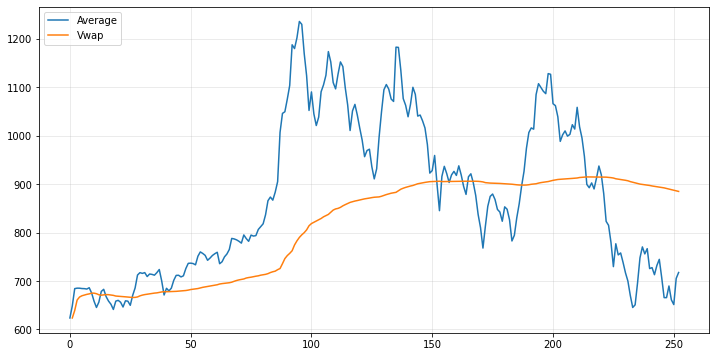

In [26]:
plt.rcParams['figure.figsize'] = 12, 6
plt.plot(tsla['AveragePrice'], label='Average')

plt.plot(tsla['vwap-1'], label='Vwap')
plt.legend(loc=2)
plt.grid(True, alpha=.3)

#Arrival Price

## Implementation Shortfall (IS) is defined as the difference in price between the time a portfolio manager makes an investment decision and the actual price achieved. Another component is the opportunity cost of any quantity unexecuted during the implementation.
## When deciding to buy or sell stocks during portfolio construction, a portfolio manager looks at the prevailing prices (decision prices).
##   However, due to a number of factors, the execution prices may be different from the decision prices. This can result in returns that differ from the portfolio manager’s expectations. 


####Over the years there have been proponents and detractors of this approach as a measurement of execution costs and a benchmark for execution algorithms. 

####There is no perfect solution to the challenges of measuring implicit costs and assessing trader, broker, or algorithm performance, but overall this one is pretty good. 

####The crucial point to compare this with other benchmarks is that this is the one most relevant to the portfolio manager. If the market’s volume weighted average price (VWAP) is used as a benchmark it is only half the story 

####The point that’s missed is that someone had to decide over what time frame to trade in order to compare the execution performance to the VWAP over that time. 
####That decision (usually an arbitrary one made in an attempt to minimize market impact) is a crucial part of the execution process, but that itself escapes assessment if only VWAP slippage is measured. 
####The other issue with VWAP as well as TWAP, market open or close prices is that they are benchmarks that can be influenced by the trade itself. 
####Zero slippage to VWAP but being 100 percent of market volume does not necessarily mean it is a good execution. Zero slippage to the closing price while being part of an adverse high / low on the close is also not a good execution. 
####AP does provide an overall measure that incorporates all aspects of the execution. Where VWAP can play an important role is in conjunction with the AP benchmark – looking at both gives context on market direction during the execution and how the execution compared with the market over that time.

####Two aspects that make up realized implicit trading costs 
####1. market drift
####2. market impact. 
####Optimizing between these two is often referred to as “the trader’s dilemma”, i.e. you can trade faster with more impact to minimize market drift away, or trade slower to minimize market impact but risk market drift away. 

####However, you will never know what the market would have done if you had not traded. You can try to extrapolate the price trajectory forward based on the momentum it showed in the minutes before the trade, but markets often change direction. 

####You can apply some correction from the overall market, using the beta for the asset, but in practice that removes only a small part of the randomness.

####There is still the essential difficulty that you are part of the market, and other people may be choosing to trade at the same times and for the same reasons you are. 
####Thus market impact and drift are not so different. It is hard to know what is good and what is bad arrival price slippage, but knowing it does allow for comparison across different execution methods, and if a reliable conclusion can be drawn, switching to the better method yields performance improvements for the strategy. 
####It also enables portfolio managers to compare their cost assumptions with reality and understand their own implementation shortfall so that they may improve their models.



## Arrival Price (AP) is a dynamic liquidity-seeking algorithm that aims to minimize implementation shortfall by completing an order close to its arrival price. 
## It is designed to manage the trade-off between market impact and price risk. 
## It will build an optimal trading schedule based on order size, expected participation rate, desired start and end times, and stock-specific characteristics including historical volume, volatility and spread. 
## The trading schedule will dynamically adapt to real-time market conditions throughout the order’s lifecycle.

###  EXPECTED PARTICIPATION % DRIVES THE TARGET TRADING SCHEDULE

### URGENCY CONTROLS DISCRETION AROUND THE TRADING SCHEDULE

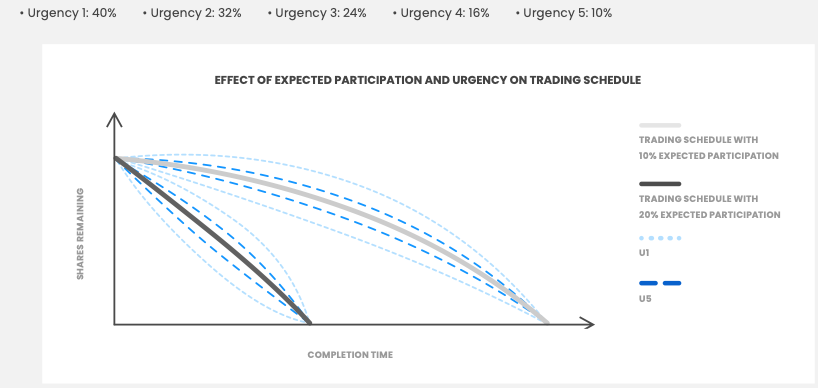

https://www.linkedin.com/in/robert-almgren-31303147/

https://thewallstreetlab.com/77-robert-almgren-a-deep-dive-into-optimal-trade-execution-in-fixed-income-and-futures-using-quantitative-methods/

https://chat.whatsapp.com/EEqyd6T8T1zHIabXzeHsQM
